In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import datetime as datetime

filepath = 'OPENDATA_BOOKING_CALL_A_BIKE.csv'
chunksize = 10 ** 6
date_before = pd.Timestamp('2016-01-01')
dates_from_data = ['DATE_BOOKING','DATE_FROM', 'DATE_UNTIL']
needed_cols = ['DATE_BOOKING' , 'DATE_FROM', 'DATE_UNTIL', 'START_RENTAL_ZONE', 'END_RENTAL_ZONE', 'CITY_RENTAL_ZONE']

def load_csv():
    data_iterator = pd.read_csv(filepath, chunksize=chunksize, sep=';', parse_dates=dates_from_data, usecols=needed_cols)

    chunk_list = []  

    # Each chunk is in dataframe format
    for data_chunk in data_iterator:  
        filtered_chunk = data_chunk[(data_chunk['CITY_RENTAL_ZONE'] == 'Hamburg') & (data_chunk['DATE_UNTIL'] < date_before)]
        chunk_list.append(filtered_chunk)
    
    filtered_data = pd.concat(chunk_list)
    
%time load_csv()

CPU times: user 1min 25s, sys: 11.2 s, total: 1min 36s
Wall time: 1min 36s


In [4]:
#00954 UFS Deutsche Bucht    -- geoBreite = 54.1796   geoLaenge = 7.4587 This is in the Nordsee and can't be used to the city hamburg
#01228 UFS TW Ems            -- geoBreite = 54.1651   geoLaenge = 6.3460 Same as above
#01975 Hamburg-Fühlsbüttel   -- geoBreite = 53.6332   geoLaenge = 9.9881
#01981 Hamburg-Neuwiedenthal -- geoBreite = 53.4777   geoLaenge = 9.8957
#06254 Hamburg-Lotsenhöft    -- not available
#13904 Nordseeboje 2         -- only till 2010

#TODO GET GOOGLE MAPS COORDINATES WITH PICTURES https://www.gpskoordinaten.de

In [84]:
filepath_dict = ['temperature_station_00954.csv', 'temperature_station_01228.csv']

station_00954 = pd.read_csv(filepath_dict[0], sep=';', usecols=['STATIONS_ID','MESS_DATUM','TT_TU'])
station_01228 = pd.read_csv(filepath_dict[1], sep=';', usecols=['STATIONS_ID','MESS_DATUM','TT_TU'])

In [85]:
date_after = pd.Timestamp('2014-01-01')

#Format the Dates from Object to DateTime Types
station_00954['MESS_DATUM'] = pd.to_datetime(station_00954['MESS_DATUM'], format='%Y%m%d%H')
station_01228['MESS_DATUM'] = pd.to_datetime(station_01228['MESS_DATUM'], format='%Y%m%d%H')


#Filter for the Data from 2014-2015
station_00954 = station_00954[(station_00954['MESS_DATUM'] > date_after) & (station_00954['MESS_DATUM'] < date_before)]
station_01228 = station_01228[(station_01228['MESS_DATUM'] > date_after) & (station_01228['MESS_DATUM'] < date_before)]


#Check which station has more values and use that one
if len(station_00954) > len(station_01228):
    print('Station 1 has more values')
else:
    print('Station 2 has more values')

Station 2 has more values


In [86]:
#CHECK IF MISSING VALUES ARE SMALLER THAN 5%
percentage_missing_values = (station_01228['TT_TU'][station_01228['TT_TU'] == -999.0].count()/station_01228['TT_TU'].count())*100
print("Missing values in station 2 are: {0:1.2f}%".format(percentage_missing_values))

Missing values in station 2 are: 0.06%


In [87]:
#The missing values of both sets are under 1%, so we can just drop them according to https://www.statisticssolutions.com/missing-values-in-data/
#So we will first change 
temperature_data = station_2[station_2['TT_TU'] != -999]

In [88]:
#How much percent of the whole data do we have
print(len(temperature_data)/(365*24*2))

0.7627283105022831


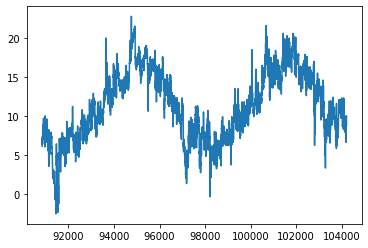

In [82]:
plt.plot(temperature_data['TT_TU'])

In [69]:
#CHECK HOW MANY VALUES ARE MISSING OVER THE TWO PERIOD SPAN

In [99]:
temperature_data.iloc[7100:7200]

,STATIONS_ID,MESS_DATUM,TT_TU
97949,1228,2015-01-02 22:00:00,7.6
97950,1228,2015-01-02 23:00:00,7.7
97951,1228,2015-01-03 00:00:00,7.7
97952,1228,2015-01-03 01:00:00,7.5
97953,1228,2015-01-03 02:00:00,7.7
...,...,...,...
98044,1228,2015-01-06 22:00:00,7.6
98045,1228,2015-01-06 23:00:00,7.0
98046,1228,2015-01-07 00:00:00,7.5
98047,1228,2015-01-07 01:00:00,7.9
